<a href="https://colab.research.google.com/github/duong4595/ib9cw0-text-analytics-23-24/blob/main/Copy_of_Lecture3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling
Topic Modeling is a type of statistical modeling for discovering the abstract "topics" that occur in a collection of documents. It is a frequent technique in text mining for uncovering hidden semantic structures in a text body. This process is useful in various applications like organizing large archives of texts, summarizing information, and aiding in understanding the main themes of texts without reading them in full. We will look at several techniques for topic modeling including LDA, LSA, NMF and BERTopic.


## LDA

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# nltk.download() to look at options

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel

In [ ]:
# Function to preprocess the data
def preprocess_texts(documents):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    preprocessed_texts = []
    for text in documents:
        text = text.lower()
        tokens = nltk.word_tokenize(text)
        tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        preprocessed_texts.append(tokens)  # Append list of tokens directly, without joining them into a string

    return preprocessed_texts


In [ ]:
# Sample data and preprocessing
documents = [
    "Sugar is bad to consume. My sister likes to have sugar, but not my father.",
    "My father spends a lot of time driving my brother around to baseball practice.",
    "Some health experts suggest that driving may cause increased stress and blood pressure.",
    "I often feel pressure to perform well at school, but my father never seems to drive my sister to do better.",
    "Health professionals say that Sugar is not good for your lifestyle."
]

# 'texts' will be a list of lists of tokens
texts = preprocess_texts(documents)

dictionary = Dictionary(texts)

# Create a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]


In [ ]:
# Set parameters
num_topics = 2
passes = 10 #how many iterations

# Create the LDA model
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Display the topics
topics = lda.print_topics(num_words=5) #print 5 important words of each topic
for topic in topics:
    print(topic)


(0, '0.073*"health" + 0.044*"driving" + 0.044*"pressure" + 0.044*"cause" + 0.044*"sugar"')
(1, '0.076*"father" + 0.055*"sugar" + 0.054*"sister" + 0.033*"better" + 0.033*"never"')


The variations in output each time you run an LDA model are due to the stochastic nature of the algorithms used in Latent Dirichlet Allocation. Here are the key reasons for these variations:

* Random Initialization: Most LDA implementations (including gensim) start with a random initialization of the topic assignments for each word. This randomness affects the subsequent updates and iterations of the algorithm.

* Sampling Methods: LDA often uses sampling methods like Gibbs sampling or variational Bayes inference to estimate the distributions of topics over words and documents. These methods inherently involve randomness, which can lead to different results each time the model is trained, especially if the number of iterations is not large enough to reach convergence.

* Convergence Issues: If the LDA model doesn't fully converge due to too few iterations or poor parameter settings (like learning rates), the output may vary significantly between runs. Achieving convergence in probabilistic models can be challenging and might require tuning parameters such as the number of iterations and choosing appropriate hyperparameters (like alpha and beta for LDA).

* Number of Topics: The choice of the number of topics (num_topics) can also influence the stability of your topics. Too few or too many topics can lead to overfitting or underfitting, respectively, making the model sensitive to initial conditions or specific samples of data.

### Ensuring Consistency

To reduce the variability in your LDA models, you can take the following steps:

* Set a Random Seed: Most LDA implementations allow you to set a random seed to make the results reproducible. This is done by fixing the seed for the random number generator used by the model.

* Increase the Number of Iterations: Allowing more iterations can help the model converge more consistently, which, in turn, makes the output more stable.

* Tune Hyperparameters: Adjusting the hyperparameters, such as alpha (document-topic density) and beta (topic-word density), can help in achieving better and more consistent results. These parameters control the sparsity of the topics extracted by the model.

* Extensive Preprocessing: More consistent and thorough preprocessing of the text data can lead to less noise in the input, which helps stabilize the output.

```
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',  # can be set as a scalar like '0.01' or 'auto' for learning the optimal alpha
    eta='auto'     # eta is another name for beta in gensim, similarly settable
)
```




In [ ]:
# Set parameters
num_topics = 5
passes = 100

# Create the LDA model
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes,random_state=100)

# Display the topics
topics = lda.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.084*"driving" + 0.046*"health" + 0.046*"blood" + 0.046*"expert" + 0.046*"may"')
(1, '0.028*"father" + 0.028*"health" + 0.028*"sister" + 0.028*"pressure" + 0.028*"professional"')
(2, '0.028*"father" + 0.028*"health" + 0.028*"sister" + 0.028*"pressure" + 0.028*"professional"')
(3, '0.158*"sugar" + 0.059*"bad" + 0.059*"consume" + 0.059*"like" + 0.059*"health"')
(4, '0.063*"father" + 0.063*"sister" + 0.063*"pressure" + 0.062*"never" + 0.062*"drive"')


We can also display the topics as wordclouds:

In [ ]:
%pip install wordcloud

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

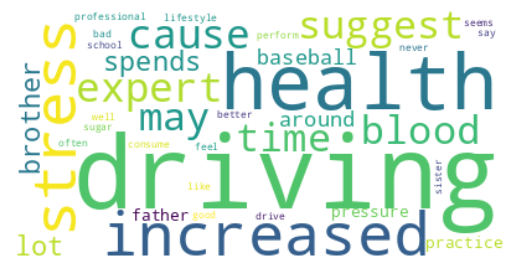

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.show_topic(topic, 200)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    return plt

create_wordcloud(lda, topic=0)

#Coherence Score (to pick the number of topics)
Coherence measures the degree of semantic similarity between high scoring words in the topic. These scores help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)


Coherence Score: 0.3833486338856585


# Number of Topics

[0.3076742654074003, 0.35277825048982697, 0.36186683579444917, 0.3833486338856585, 0.35391722925878993, 0.38624492795914184, 0.38377494843428145, 0.37262943369153934]


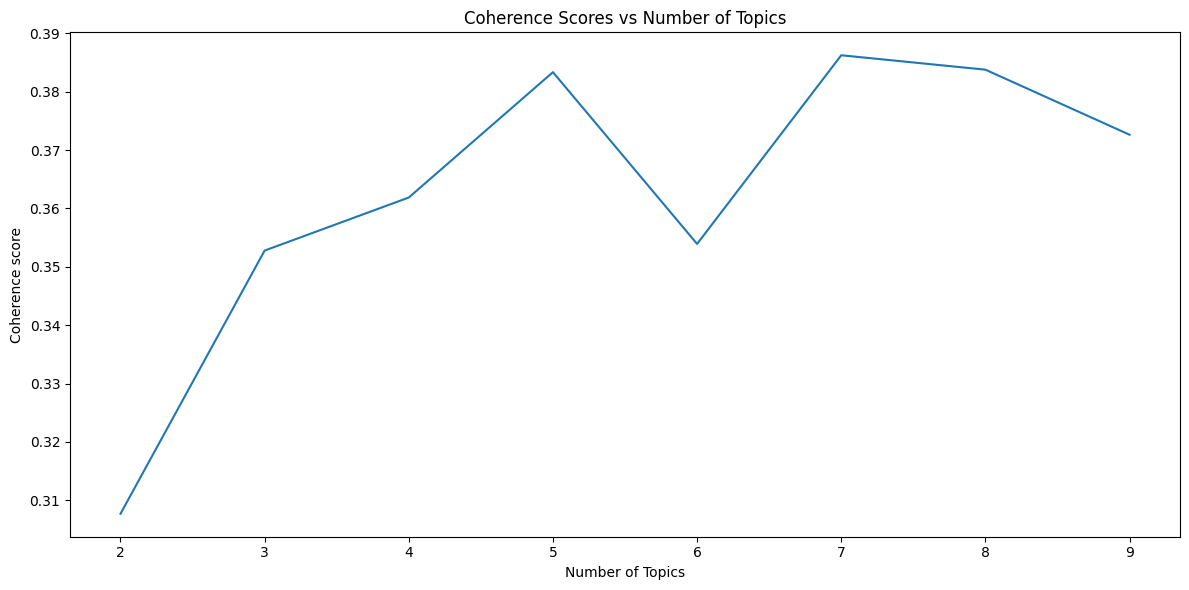

In [ ]:
import matplotlib.pyplot as plt

# Range of topics to evaluate
topic_range = range(2, 10)

# List to store coherence
coherence_scores = []

for num_topics in topic_range:
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, random_state=100)
    # Initialize CoherenceModel after training the LDA model
    coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()

    # Append the coherence score
    coherence_scores.append(coherence_lda)

print(coherence_scores)
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(topic_range, coherence_scores)
plt.title("Coherence Scores vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.tight_layout()
plt.show()


# LSA

In [ ]:
from gensim.models import LdaModel,CoherenceModel,TfidfModel,Nmf,LsiModel

In [ ]:
# train LSA model
num_topics = 5
lsa_model = LsiModel(corpus, num_topics=num_topics, id2word=dictionary,random_seed=100)
topics = lsa_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

coherence_model_lsa = CoherenceModel(model=lsa_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lsa = coherence_model_lsa.get_coherence()
print('Coherence Score:', coherence_lsa)

(0, '0.406*"father" + 0.323*"sister" + 0.290*"pressure" + 0.273*"sugar" + 0.207*"drive"')
(1, '0.359*"driving" + 0.304*"health" + 0.271*"blood" + 0.271*"increased" + 0.271*"may"')
(2, '-0.594*"sugar" + -0.231*"consume" + -0.231*"like" + -0.231*"bad" + 0.225*"pressure"')
(3, '0.298*"baseball" + 0.298*"around" + 0.298*"practice" + 0.298*"lot" + 0.298*"time"')
(4, '-0.389*"say" + -0.389*"professional" + -0.389*"good" + -0.389*"lifestyle" + -0.294*"health"')
Coherence Score: 0.27500897972208205


##NMF

In [ ]:
# train NMF model
num_topics = 5
nmf_model = Nmf(corpus,id2word=dictionary, num_topics=num_topics,passes=20,random_state=100)
topics = nmf_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

coherence_model_nmf = CoherenceModel(model=nmf_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_nmf = coherence_model_nmf.get_coherence()
print('Coherence Score:', coherence_nmf)


(0, '0.112*"driving" + 0.110*"time" + 0.110*"practice" + 0.110*"brother" + 0.110*"spends"')
(1, '0.086*"pressure" + 0.085*"school" + 0.085*"often" + 0.085*"feel" + 0.085*"drive"')
(2, '0.268*"sugar" + 0.143*"father" + 0.143*"sister" + 0.137*"like" + 0.137*"consume"')
(3, '0.100*"may" + 0.100*"cause" + 0.100*"suggest" + 0.100*"blood" + 0.100*"stress"')
(4, '0.165*"sugar" + 0.162*"lifestyle" + 0.162*"say" + 0.162*"good" + 0.162*"professional"')
Coherence Score: 0.33968419477897527


##LSA vs NMF
* Comparison and Use Cases Interpretability: NMF often provides more interpretable topics than LSA because of the non-negativity constraint, which aligns better with the intuitive notion of adding up features to form a dataset.
* Handling of Synonyms and Polysemy: LSA can handle synonyms better due to its dimensional reduction approach, but it struggles with polysemy (words with multiple meanings) because all occurrences of a word are mapped to a single point in semantic space.
* Usage: LSA is often preferred for tasks involving similarity and information retrieval due to its robust handling of noise and ability to capture underlying semantic patterns. NMF is favored for clustering and classification tasks where interpretability of components (topics) is crucial.

 Both LSA and NMF are valuable tools in the text mining and information retrieval toolkit, chosen based on the specific requirements of clarity, ease of interpretation, and the nature of the text data.

## BERT Topic Modeling
BERTopic is a topic modeling tool that leverages transformers and language models like BERT for generating topics from textual data. Unlike traditional methods such as LDA, BERTopic utilizes contextual embeddings, which can capture the meanings of words more effectively in different contexts.

Since the example we have used thus far is too small for this technique (due to embeddings - we will discuss this later), we will use the first 100 reviews from the ``Reviews.csv`` file.

In [ ]:
%pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 36.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 17.5 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (7

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd

# Load the dataset and read the first 100 rows
#file_path = 'Reviews.csv'
#df = pd.read_csv(file_path,nrows=100)

df = pd.read_csv('https://raw.githubusercontent.com/duong4595/ib9cw0-text-analytics-23-24/main/Data/Reviews.csv',nrows=100)

# Display the first few rows of the dataset and columns to identify the 'Review' column
df.head(), df.columns


(   Clothing ID  Age                              Title  \
 0            0   26                                NaN   
 1            1   50    Love this under-all cami tank ?   
 2            1   36                       Staple tank!   
 3            1   24        Love but also very annoying   
 4            2   28  Gorgeous top, straps way too long   
 
                                               Review  Rating  Recommended  \
 0                                                NaN       5            1   
 1  Originally i bought this in black and white. r...       5            1   
 2  Love this tank. material and fit are great. lo...       5            1   
 3  I love this tank, it is so comfortable but it ...       2            0   
 4  I just adore this top! it is so comfy and styl...       4            1   
 
    PositiveFeedbackCount   Division Department      Class        Date  
 0                      0    General    Jackets  Outerwear  02/03/2018  
 1                      0  I

In [ ]:
# Put it all into a function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    return ' '.join(tokens)

In [ ]:
# Remove rows where 'Review' is NaN
df = df.dropna(subset=['Review'])
df['Review']= df['Review'].apply(preprocess_text)

<ipython-input-19-5cc9c8a1a587>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review']= df['Review'].apply(preprocess_text)


### BERTopic

In [ ]:
from bertopic import BERTopic

In [ ]:
# Initialize BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True)

# Fit the model on the limited data
topics, probabilities = topic_model.fit_transform(df['Review'])

# Display the topic info
topic_info = topic_model.get_topic_info()
print(topic_info)

# Optionally, print individual topics
for topic in topic_model.get_topics().items():
    print(topic)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

   Topic  Count                       Name  \
0     -1     31    -1_love_size_one_bought   
1      0     30  0_love_dress_perfect_like   
2      1     16        1_bra_fits_wear_cup   
3      2     12     2_suit_size_short_good   

                                      Representation  \
0  [love, size, one, bought, ordered, feel, tank,...   
1  [love, dress, perfect, like, wear, color, much...   
2  [bra, fits, wear, cup, great, size, got, band,...   
3  [suit, size, short, good, top, first, makes, t...   

                                 Representative_Docs  
0  [bikini bottoms high quality feel luxurious or...  
1  [sweater comfy classic balances quirky look be...  
2  [undergarments comfortable streamlined well ma...  
3  [first suit ever ordered online first one piec...  
(-1, [('love', 0.05301848483982351), ('size', 0.051321704885996716), ('one', 0.04869869620810445), ('bought', 0.047852195687496074), ('ordered', 0.04328772996275951), ('feel', 0.04328772996275951), ('tank', 0.0391

### Visualize

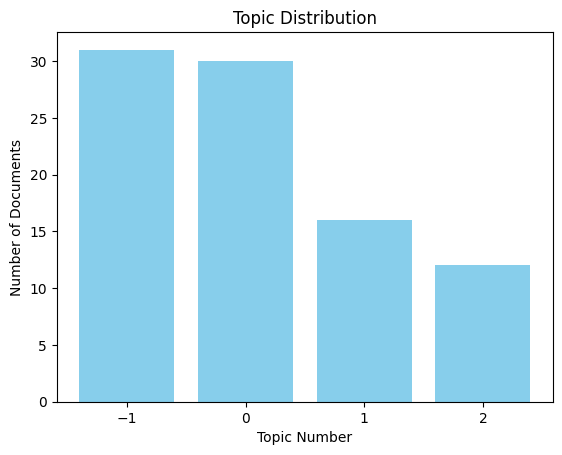

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'topics' contains the output from BERTopic
unique_topics, counts = np.unique(topics, return_counts=True)

# Simple bar chart to show topic distribution
plt.bar(unique_topics, counts, color='skyblue')
plt.xlabel('Topic Number')
plt.ylabel('Number of Documents')
plt.title('Topic Distribution')
plt.xticks(unique_topics)
plt.show()



### Top terms for each topic

In [ ]:
data = topic_model.get_topics()
rows = []
for topic, terms in data.items():
    for term, weight in terms:
        rows.append({'topic': topic, 'term': term, 'weight': weight})
df = pd.DataFrame(rows)
sorted_df = df.sort_values(by=['topic', 'weight'], ascending=[True, False])
print(sorted_df)

    topic         term    weight
0      -1         love  0.053018
1      -1         size  0.051322
2      -1          one  0.048699
3      -1       bought  0.047852
4      -1      ordered  0.043288
5      -1         feel  0.043288
6      -1         tank  0.039191
7      -1          fit  0.038845
8      -1        would  0.037218
9      -1  comfortable  0.035471
10      0         love  0.062679
11      0        dress  0.062119
12      0      perfect  0.059699
13      0         like  0.058161
14      0         wear  0.054243
15      0        color  0.047027
16      0         much  0.047027
17      0      sweater  0.045430
18      0         gown  0.041558
19      0         long  0.035270
20      1          bra  0.123096
21      1         fits  0.059855
22      1         wear  0.055874
23      1          cup  0.049467
24      1        great  0.049183
25      1         size  0.048146
26      1          got  0.042252
27      1         band  0.041441
28      1       straps  0.036765
29      1 

# Some practical considerations

In [ ]:
# Load the dataset and read the first 100 rows
#file_path = 'Reviews.csv'
#df = pd.read_csv(file_path,nrows=100)
df = pd.read_csv('https://raw.githubusercontent.com/duong4595/ib9cw0-text-analytics-23-24/main/Data/Reviews.csv',nrows=100)


## Preprocessing
Depending on the context, you may want to focus on terms that have a particular part-of-speech. For this case, let's only keep terms that are nouns and adjectives. Here are the steps to modify the `preprocess_text` function:

* Tokenize the text.
* Use part-of-speech tagging to identify the POS of each token.
* Filter out tokens that are not nouns or adjectives.
* Remove stopwords and non-alphabetic tokens.
* Join the tokens back into a string.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Part-of-speech tagging
    tagged_tokens = nltk.pos_tag(tokens)

    # Filter tokens that are nouns or adjectives
    # NN* for nouns, JJ* for adjectives
    tokens = [word for word, tag in tagged_tokens if tag in ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS']]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]

    return ' '.join(tokens)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Remove rows where 'Review' is NaN
df = df.dropna(subset=['Review'])
df['Review']= df['Review'].apply(preprocess_text)

In [ ]:
df[['Review']]

,Review
1,black white several different colorways perfec...
2,tank material fit great reversible recommend
3,tank comfortable flaws time walk anything both...
4,top comfy stylish little purple cardigan feel ...
5,sweater definite classic lots compliments
...,...
92,present happy pattern fun slouchy fit
93,lbs tank nice thin layer little low cut cleavage
94,tanks straps wide bra straps soft added length...
97,nice lightweight super stylish


In [ ]:
# 'texts' will be a list of lists of tokens
texts = preprocess_texts(df['Review'])

dictionary = Dictionary(texts)

# Create a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

## LDA

In [ ]:
# Set parameters
num_topics = 2
passes = 10

# Create the LDA model
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Display the topics
topics = lda.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.019*"suit" + 0.017*"size" + 0.012*"small" + 0.011*"top" + 0.010*"color" + 0.010*"comfortable" + 0.009*"little" + 0.009*"fit" + 0.008*"much" + 0.008*"soft"')
(1, '0.021*"size" + 0.018*"bra" + 0.018*"perfect" + 0.018*"great" + 0.016*"fit" + 0.015*"dress" + 0.012*"comfortable" + 0.011*"color" + 0.011*"sweater" + 0.011*"time"')


## Choose the number of topics

[0.2775663720454346, 0.3028677466800543, 0.33696836370938066, 0.3266251284126911, 0.3446052709778307, 0.3522912205875274, 0.34122243741569713, 0.3284349836194244]


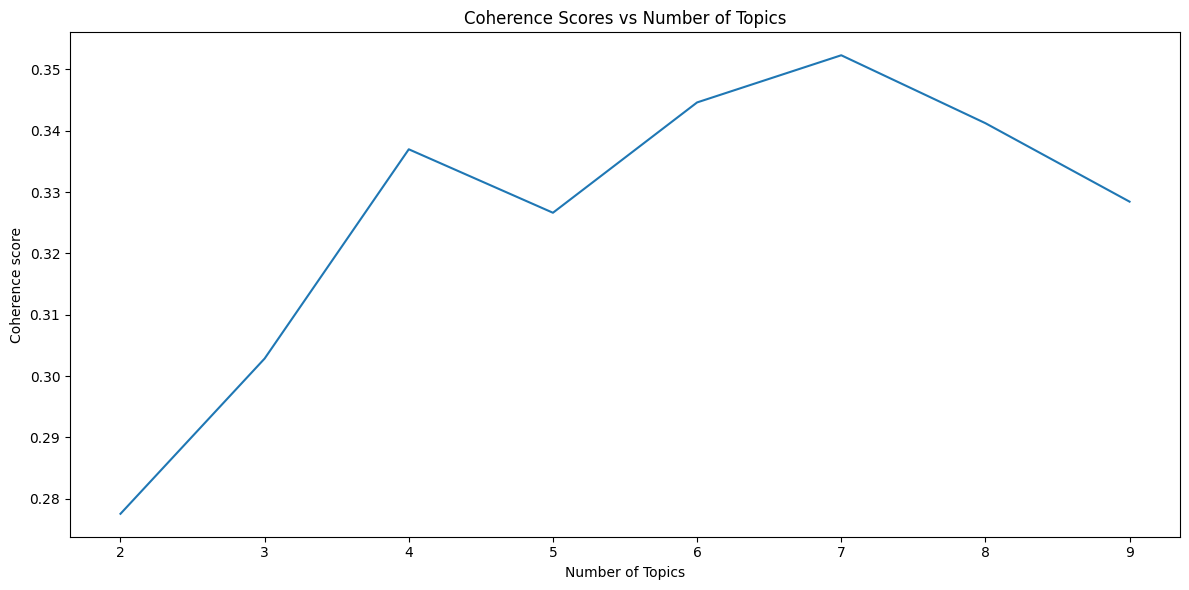

In [ ]:
import matplotlib.pyplot as plt

# Range of topics to evaluate
topic_range = range(2, 10)

# List to store coherence
coherence_scores = []

for num_topics in topic_range:
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, random_state=100)
    # Initialize CoherenceModel after training the LDA model
    coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()

    # Append the coherence score
    coherence_scores.append(coherence_lda)

print(coherence_scores)
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(topic_range, coherence_scores)
plt.title("Coherence Scores vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.tight_layout()
plt.show()

In [ ]:
# Set optimal number of topics
num_topics = 7
passes = 10

# Create the LDA model
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Display the topics
topics = lda.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.022*"great" + 0.018*"tank" + 0.018*"comfortable" + 0.018*"sweater" + 0.018*"sexy" + 0.017*"size" + 0.014*"top" + 0.014*"cute" + 0.014*"natori" + 0.014*"color"')
(1, '0.016*"perfect" + 0.016*"color" + 0.016*"time" + 0.013*"super" + 0.013*"year" + 0.013*"bralette" + 0.010*"suit" + 0.010*"favorite" + 0.010*"gown" + 0.010*"much"')
(2, '0.028*"perfect" + 0.024*"bra" + 0.021*"dress" + 0.016*"fit" + 0.014*"short" + 0.014*"lace" + 0.014*"small" + 0.014*"soft" + 0.014*"strap" + 0.013*"great"')
(3, '0.039*"size" + 0.025*"small" + 0.022*"suit" + 0.021*"fit" + 0.015*"look" + 0.015*"good" + 0.015*"cup" + 0.015*"piece" + 0.014*"color" + 0.014*"bra"')
(4, '0.020*"color" + 0.020*"size" + 0.020*"suit" + 0.015*"perfect" + 0.015*"panty" + 0.015*"length" + 0.015*"short" + 0.015*"comfortable" + 0.011*"first" + 0.010*"pant"')
(5, '0.021*"soft" + 0.008*"way" + 0.008*"bloom" + 0.008*"feel" + 0.008*"style" + 0.008*"bra" + 0.008*"nice" + 0.008*"comfortable" + 0.008*"length" + 0.008*"pleased"')
(6, '0.034

## Visualize

### Print top 5 terms in each topic

In [ ]:
# Print the top 5 terms for each topic
for topic_id in range(num_topics):
    top_terms = lda.show_topic(topic_id, topn=5)  # Get the top 5 terms for this topic
    terms = ', '.join([term for term, _ in top_terms])
    print(f"Topic {topic_id}: {terms}")

Topic 0: great, tank, comfortable, sweater, sexy
Topic 1: perfect, color, time, super, year
Topic 2: perfect, bra, dress, fit, short
Topic 3: size, small, suit, fit, look
Topic 4: color, size, suit, perfect, panty
Topic 5: soft, way, bloom, feel, style
Topic 6: size, time, bra, great, dress


## Interactive Web-based Visualization

In [ ]:
%pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.8 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Assume `lda` is the LDA model and `corpus` and `dictionary` are your corpus and dictionary from Gensim

# Prepare the visualization data
vis_data = gensimvis.prepare(lda, corpus, dictionary)

# Display the visualization in a Jupyter Notebook (or in an IPython environment)
pyLDAvis.display(vis_data)

# To save the visualization as an HTML file
pyLDAvis.save_html(vis_data, 'lda_visualization.html')


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


# Your Turn
Conduct topic modeling with `sms_spam.csv`and `oct_delta.csv` data.

## SMS-Spam
### Preprocessing

In [ ]:
# Load the dataset
sms = pd.read_csv('https://raw.githubusercontent.com/duong4595/ib9cw0-text-analytics-23-24/main/Data/sms_spam.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Clean data: Remove rows with missing 'text' values
cleaned_sms = sms.dropna(subset=['text'])

# Function to preprocess text
def preprocess_text(text):
  """Preprocesses text data by performing:
      - Lowercasing
      - Tokenization
      - Stopword removal (including custom words)
      - Alphabetic character filtering
      - Lemmatization
  """
  text = text.lower()
  tokens = nltk.word_tokenize(text)
  stop_words = stopwords.words('english')
  extra_words = ['.','*',',', 'ur', 'lor', 'da', 'u', 'n', 'gt']
  stop_words.extend(extra_words)
  tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return tokens  # Return a list of tokens, not a joined string

# Preprocess SMS text column
cleaned_sms['text'] = cleaned_sms['text'].apply(preprocess_text)

# Create a list of lists for tokens (one list per message)
texts_sms = cleaned_sms['text'].tolist()

# Create the dictionary using the list of lists
dictionary_sms = Dictionary(texts_sms)

# Create a document-term matrix
corpus_sms = [dictionary_sms.doc2bow(text) for text in texts_sms]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### LDA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.34809504921245504, 0.38500911028031565, 0.33646919755934956, 0.3007258765648306, 0.33960049280179366, 0.31804840833470227, 0.34370438892541866, 0.35713832108863325]


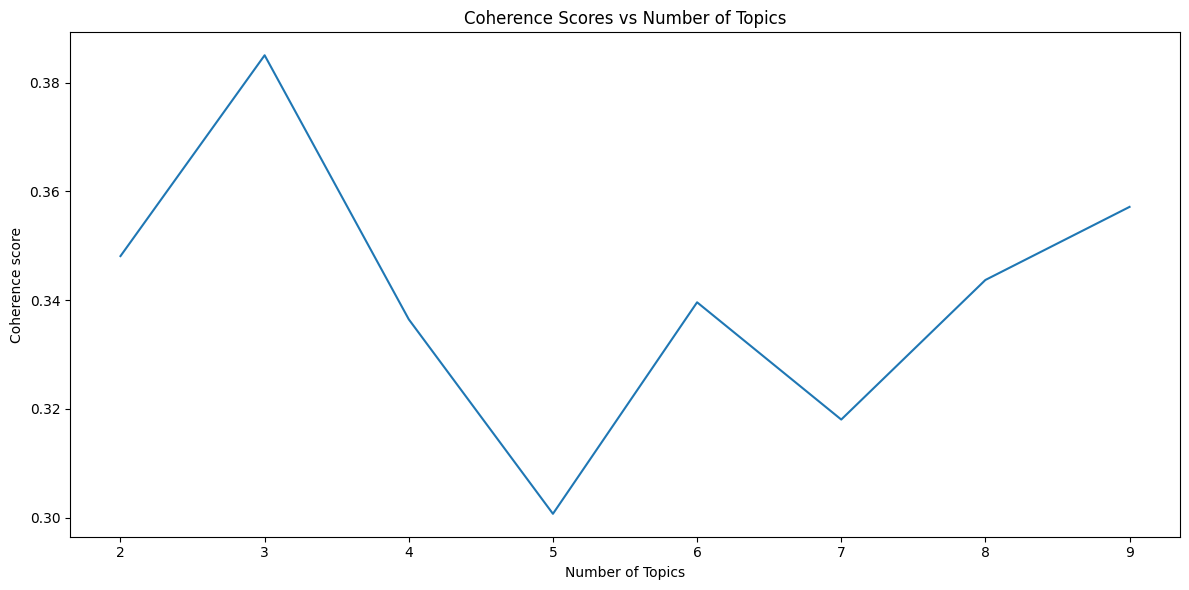

In [ ]:
# Range of topics to evaluate
num_topics_sms = 3
passes_sms = 30
topic_range_sms = range(2, 10)

# List to store coherence
coherence_scores_sms = []

for num_topics_sms in topic_range_sms:
    lda_sms = LdaModel(corpus=corpus_sms, id2word=dictionary_sms, num_topics=num_topics_sms, passes=passes_sms, random_state=100)
    # Initialize CoherenceModel after training the LDA model
    coherence_model_lda = CoherenceModel(model=lda_sms, texts=texts_sms, dictionary=dictionary_sms, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()

    # Append the coherence score
    coherence_scores_sms.append(coherence_lda)

print(coherence_scores_sms)
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(topic_range_sms, coherence_scores_sms)
plt.title("Coherence Scores vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.tight_layout()
plt.show()

In [ ]:
# Set parameters
num_topics_sms = 3
passes_sms = 30

# Create the LDA model
lda_sms = LdaModel(corpus=corpus_sms, id2word=dictionary_sms, num_topics=num_topics_sms, passes=passes_sms,random_state=100)

# Display the topics
topics_sms = lda_sms.print_topics(num_words=10)
for topic in topics_sms:
    print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.017*"come" + 0.012*"got" + 0.012*"home" + 0.012*"go" + 0.011*"get" + 0.008*"back" + 0.008*"k" + 0.007*"want" + 0.007*"wat" + 0.006*"still"')
(1, '0.041*"call" + 0.019*"free" + 0.014*"text" + 0.014*"lt" + 0.011*"stop" + 0.011*"txt" + 0.011*"mobile" + 0.009*"reply" + 0.008*"send" + 0.008*"please"')
(2, '0.011*"know" + 0.011*"good" + 0.010*"day" + 0.010*"love" + 0.009*"like" + 0.008*"ok" + 0.007*"sorry" + 0.006*"later" + 0.006*"dont" + 0.006*"time"')


In [ ]:
# Print the top 5 terms for each topic
for topic_id in range(num_topics_sms):
    top_terms_sms = lda_sms.show_topic(topic_id, topn=10)  # Get the top 5 terms for this topic
    terms = ', '.join([term for term, _ in top_terms_sms])
    print(f"Topic {topic_id}: {terms}")

Topic 0: come, got, home, go, get, back, k, want, wat, still
Topic 1: call, free, text, lt, stop, txt, mobile, reply, send, please
Topic 2: know, good, day, love, like, ok, sorry, later, dont, time


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### LSA

In [ ]:
# train LSA model
num_topics_sms = 5
lsa_model_sms = LsiModel(corpus, num_topics=num_topics_sms, id2word=dictionary_sms,random_seed=100)
topics_sms = lsa_model_sms.print_topics(num_words=5)
for topic in topics_sms:
    print(topic)

coherence_model_lsa_sms = CoherenceModel(model=lsa_model_sms, texts=texts_sms, dictionary=dictionary_sms, coherence='c_v')
coherence_lsa_sms = coherence_model_lsa_sms.get_coherence()
print('Coherence Score:', coherence_lsa_sms)

(0, '0.459*"request" + 0.275*"get" + 0.219*"great" + 0.208*"r" + 0.205*"ok"')
(1, '0.509*"request" + -0.472*"ok" + -0.211*"fear" + -0.178*"month" + -0.173*"incorrect"')
(2, '0.549*"get" + -0.359*"r" + -0.189*"speak" + -0.169*"request" + 0.168*"great"')
(3, '-0.337*"request" + -0.263*"ok" + 0.261*"tkts" + 0.260*"r" + -0.237*"question"')
(4, '0.265*"r" + 0.256*"question" + 0.239*"life" + -0.236*"word" + 0.219*"comp"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' 

Coherence Score: 0.5972330964839829


### NMF

In [ ]:
# train NMF model
num_topics_sms = 3
nmf_model_sms = Nmf(corpus,id2word=dictionary_sms, num_topics=num_topics_sms,passes=30,random_state=100)
topics_sms = nmf_model_sms.print_topics(num_words=5)
for topic in topics_sms:
    print(topic)

coherence_model_nmf_sms = CoherenceModel(model=nmf_model_sms, texts=texts_sms, dictionary=dictionary_sms, coherence='c_v')
coherence_nmf_sms = coherence_model_nmf_sms.get_coherence()
print('Coherence Score:', coherence_nmf_sms)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:578: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:607: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `s

(0, '0.055*"request" + 0.047*"ok" + 0.027*"month" + 0.026*"word" + 0.026*"fear"')
(1, '0.087*"get" + 0.034*"request" + 0.032*"great" + 0.027*"point" + 0.021*"latest"')
(2, '0.043*"r" + 0.021*"std" + 0.019*"great" + 0.018*"speak" + 0.018*"back"')
Coherence Score: 0.6213476483941358


### BERTopic

In [ ]:
# Load the dataset
sms = pd.read_csv('https://raw.githubusercontent.com/duong4595/ib9cw0-text-analytics-23-24/main/Data/sms_spam.csv')

# Clean data: Remove rows with missing 'text' values
cleaned_sms = sms.dropna(subset=['text'])

# Function to preprocess text
def preprocess_text(text):
  """Preprocesses text data by performing:
      - Lowercasing
      - Tokenization
      - Stopword removal (including custom words)
      - Alphabetic character filtering
      - Lemmatization
  """
  text = text.lower()
  tokens = nltk.word_tokenize(text)
  stop_words = stopwords.words('english')
  extra_words = ['.','*',',', 'ur', 'lor', 'da', 'u', 'n', 'gt']
  stop_words.extend(extra_words)
  tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
  return ' '.join(tokens)
  # Return a list of tokens, not a joined string

cleaned_sms['text']= cleaned_sms['text'].apply(preprocess_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Initialize BERTopic
topic_model_sms = BERTopic(language="english", calculate_probabilities=True)

# Fit the model on the limited data
topics_sms, probabilities_sms = topic_model_sms.fit_transform(sms['text'])

# Display the topic info
topic_info_sms = topic_model_sms.get_topic_info()
print(topic_info_sms)

# Optionally, print individual topics
for topic in topic_model_sms.get_topics().items():
    print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  self._all_finite = is_finite(X)


     Topic  Count                             Name  \
0       -1   2067                -1_you_to_the_and   
1        0    136             0_sleep_night_up_bed   
2        1    135  1_message_customer_missing_sent   
3        2    123          2_dinner_lunch_eat_food   
4        3    123             3_love_kiss_miss_you   
..     ...    ...                              ...   
115    114     11         114_lose_fight_win_loses   
116    115     11            115_jess_hope_baby_xx   
117    116     11   116_bill_o2fwd_incredible_jsco   
118    117     10  117_abiola_great_wishing_hoping   
119    118     10    118_activities_befor_rooms_no   

                                        Representation  \
0         [you, to, the, and, me, in, can, do, is, it]   
1    [sleep, night, up, bed, sleeping, wake, good, ...   
2    [message, customer, missing, sent, mail, email...   
3    [dinner, lunch, eat, food, hungry, having, lor...   
4    [love, kiss, miss, you, babe, boytoy, goes, my...   
.. 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


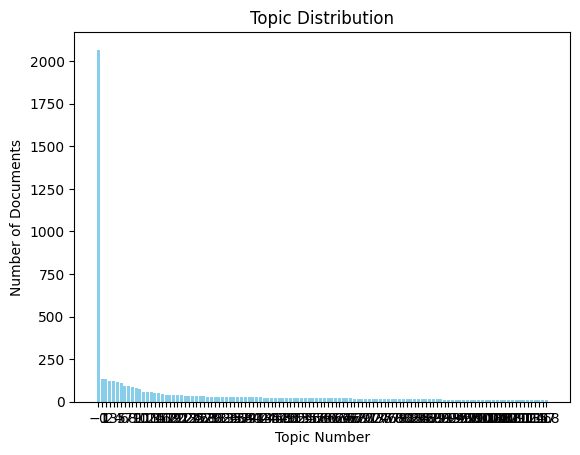

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'topics' contains the output from BERTopic
unique_topics_sms, counts_sms = np.unique(topics_sms, return_counts=True)

# Simple bar chart to show topic distribution
plt.bar(unique_topics_sms, counts_sms, color='skyblue')
plt.xlabel('Topic Number')
plt.ylabel('Number of Documents')
plt.title('Topic Distribution')
plt.xticks(unique_topics_sms)
plt.show()


## Oct-Delta

### Pre-processing

In [ ]:
# Load the dataset
oct_delta = pd.read_csv('https://raw.githubusercontent.com/duong4595/ib9cw0-text-analytics-23-24/main/Data/oct_delta.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import re
import nltk
#remove missing value
oct_delta = oct_delta.dropna(subset=['text'])
#remove emails
def remove_emails(text):
  # Regular expression to match email format
  email_domain = r"@\S*\s?"
  return re.sub(email_domain, "", text)

oct_delta['cleaned_text'] = oct_delta['text'].apply(remove_emails)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#pre-processing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = stopwords.words('english')
    extra_words = ['.', '*', ',']
    stop_words.extend(extra_words)
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    # Create a PorterStemmer object
    # stemmer = PorterStemmer()
    # df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

oct_delta['cleaned_text'] = oct_delta['cleaned_text'].apply(preprocess_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a list of lists for tokens (one list per message)
texts_oct_delta = oct_delta['cleaned_text'].tolist()

# Create the dictionary using the list of lists
dictionary_oct_delta = Dictionary(texts_oct_delta)

# Create a document-term matrix
corpus_oct_delta = [dictionary_oct_delta.doc2bow(text) for text in texts_oct_delta]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### LDA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.2950636707581252, 0.32156598934380826, 0.2914773664671651, 0.29488977005751715, 0.3264751694231826, 0.31714068411261204, 0.31806114706842625, 0.32846234395268414]


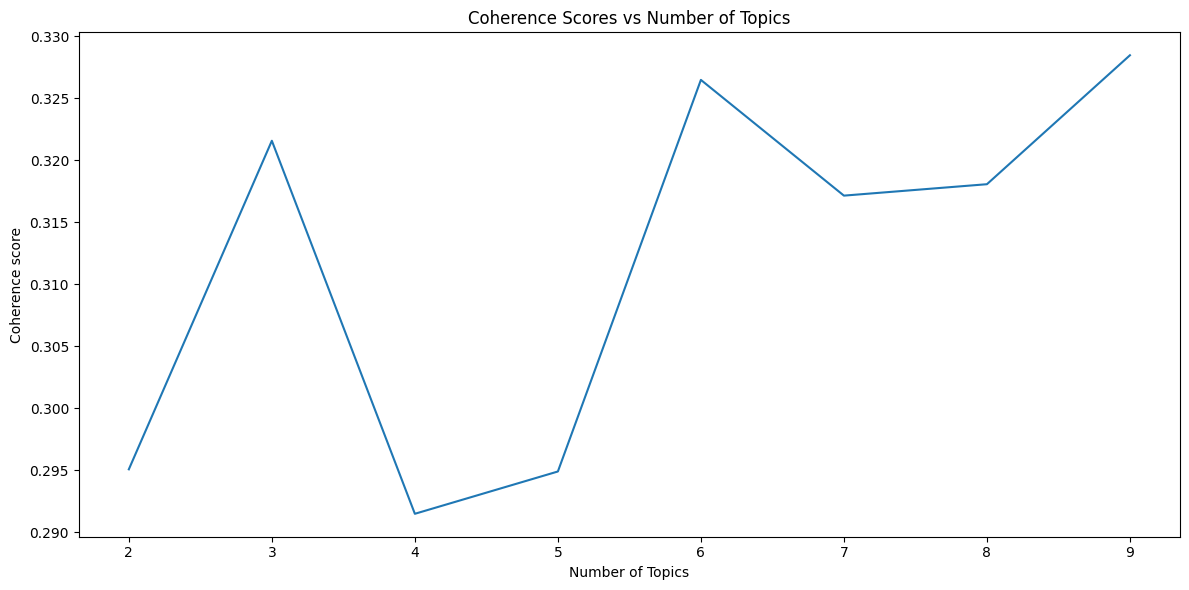

In [ ]:
# Range of topics to evaluate
num_topics_oct_delta = 3
passes_oct_delta = 30
topic_range_oct_delta = range(2, 10)

# List to store coherence
coherence_scores_oct_delta = []

for num_topics_oct_delta in topic_range_oct_delta:
    lda_oct_delta = LdaModel(corpus=corpus_oct_delta, id2word=dictionary_oct_delta,
                             num_topics=num_topics_oct_delta, passes=passes_oct_delta, random_state=100)
    # Initialize CoherenceModel after training the LDA model
    coherence_model_lda = CoherenceModel(model=lda_oct_delta, texts=texts_oct_delta,
                                         dictionary=dictionary_oct_delta, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()

    # Append the coherence score
    coherence_scores_oct_delta.append(coherence_lda)

print(coherence_scores_oct_delta)
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(topic_range_oct_delta, coherence_scores_oct_delta)
plt.title("Coherence Scores vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.tight_layout()
plt.show()

In [ ]:
# Set parameters
num_topics_oct_delta = 6
passes_oct_delta = 30

# Create the LDA model
lda_oct_delta = LdaModel(corpus=corpus_oct_delta, id2word=dictionary_oct_delta,
                         num_topics=num_topics_oct_delta, passes=passes_oct_delta,random_state=100)

# Display the topics
topics_oct_delta = lda_oct_delta.print_topics(num_words=10)
for topic in topics_oct_delta:
    print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.057*"team" + 0.021*"issue" + 0.016*"airport" + 0.015*"sure" + 0.015*"sorry" + 0.015*"flight" + 0.014*"service" + 0.013*"hear" + 0.012*"glad" + 0.012*"hi"')
(1, '0.067*"please" + 0.052*"confirmation" + 0.043*"dm" + 0.043*"number" + 0.031*"follow" + 0.030*"look" + 0.024*"take" + 0.019*"hi" + 0.019*"amp" + 0.017*"wg"')
(2, '0.044*"thank" + 0.034*"thanks" + 0.029*"u" + 0.024*"welcome" + 0.021*"great" + 0.017*"ml" + 0.017*"loyalty" + 0.017*"delta" + 0.016*"happy" + 0.015*"travel"')
(3, '0.032*"aa" + 0.022*"able" + 0.020*"flight" + 0.015*"hi" + 0.014*"r" + 0.012*"yes" + 0.011*"airport" + 0.011*"enjoy" + 0.011*"may" + 0.010*"customer"')
(4, '0.027*"http" + 0.021*"bag" + 0.021*"please" + 0.019*"baggage" + 0.017*"see" + 0.015*"sorry" + 0.015*"hi" + 0.013*"pl" + 0.012*"link" + 0.011*"service"')
(5, '0.043*"pls" + 0.031*"sorry" + 0.027*"hear" + 0.025*"know" + 0.024*"rd" + 0.021*"let" + 0.019*"hi" + 0.019*"assist" + 0.018*"hello" + 0.018*"ng"')


In [ ]:
# Print the top 5 terms for each topic
for topic_id in range(num_topics_oct_delta):
    top_terms_oct_delta = lda_oct_delta.show_topic(topic_id, topn=5)  # Get the top 5 terms for this topic
    terms = ', '.join([term for term, _ in top_terms_oct_delta])
    print(f"Topic {topic_id}: {terms}")

Topic 0: team, issue, airport, sure, sorry
Topic 1: please, confirmation, dm, number, follow
Topic 2: thank, thanks, u, welcome, great
Topic 3: aa, able, flight, hi, r
Topic 4: http, bag, please, baggage, see
Topic 5: pls, sorry, hear, know, rd


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### LSA

In [ ]:
# train LSA model
num_topics_oct_delta = 6
lsa_model_oct_delta = LsiModel(corpus_oct_delta, num_topics=num_topics_oct_delta,
                               id2word=dictionary_oct_delta,random_seed=100)
topics_oct_delta = lsa_model_oct_delta.print_topics(num_words=5)
for topic in topics_oct_delta:
    print(topic)

coherence_model_lsa_oct_delta = CoherenceModel(model=lsa_model_oct_delta,
                                               texts=texts_oct_delta,
                                               dictionary=dictionary_oct_delta, coherence='c_v')
coherence_lsa_oct_delta = coherence_model_lsa_oct_delta.get_coherence()
print('Coherence Score:', coherence_lsa_oct_delta)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/usr/local/lib/python3.10/dist-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' 

(0, '0.414*"please" + 0.308*"sorry" + 0.282*"hear" + 0.258*"hi" + 0.256*"pls"')
(1, '0.414*"please" + -0.318*"team" + -0.309*"pls" + 0.307*"number" + 0.286*"dm"')
(2, '-0.416*"team" + 0.313*"sorry" + 0.302*"know" + 0.291*"let" + -0.268*"hi"')
(3, '0.482*"team" + -0.450*"pls" + 0.327*"please" + -0.241*"confirmation" + 0.169*"service"')
(4, '0.616*"hi" + -0.223*"team" + -0.214*"confirmation" + 0.206*"thanks" + -0.205*"sorry"')
(5, '0.526*"sorry" + -0.317*"let" + 0.310*"hear" + -0.309*"know" + -0.253*"please"')
Coherence Score: 0.34243711740496896


### NMF

In [ ]:
# train NMF model
num_topics_oct_delta = 3
nmf_model_oct_delta = Nmf(corpus_oct_delta,id2word=dictionary_oct_delta,
                          num_topics=num_topics_oct_delta,passes=30,random_state=100)
topics_oct_delta = nmf_model_oct_delta.print_topics(num_words=5)
for topic in topics_oct_delta:
    print(topic)

coherence_model_nmf_oct_delta = CoherenceModel(model=nmf_model_oct_delta, texts=texts_oct_delta,
                                               dictionary=dictionary_oct_delta, coherence='c_v')
coherence_nmf_oct_delta = coherence_model_nmf_oct_delta.get_coherence()
print('Coherence Score:', coherence_nmf_oct_delta)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:578: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:607: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `s

(0, '0.075*"team" + 0.025*"hi" + 0.020*"service" + 0.016*"happy" + 0.016*"issue"')
(1, '0.064*"sorry" + 0.062*"hear" + 0.056*"pls" + 0.047*"know" + 0.047*"let"')
(2, '0.095*"please" + 0.064*"confirmation" + 0.060*"dm" + 0.055*"number" + 0.040*"follow"')
Coherence Score: 0.37769330511723914


### BERTopic

In [ ]:
# Load the dataset
oct_delta = pd.read_csv('https://raw.githubusercontent.com/duong4595/ib9cw0-text-analytics-23-24/main/Data/oct_delta.csv')

# Clean data: Remove rows with missing 'text' values
oct_delta = oct_delta.dropna(subset=['text'])

# Function to preprocess text
def preprocess_text(text):
  """Preprocesses text data by performing:
      - Lowercasing
      - Tokenization
      - Stopword removal (including custom words)
      - Alphabetic character filtering
      - Lemmatization
  """
  text = text.lower()
  tokens = nltk.word_tokenize(text)
  stop_words = stopwords.words('english')
  extra_words = ['.','*',',', 'ur', 'lor', 'da', 'u', 'n', 'gt']
  stop_words.extend(extra_words)
  tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
  return ' '.join(tokens)
  # Return a list of tokens, not a joined string

oct_delta['text']= oct_delta['text'].apply(preprocess_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Initialize BERTopic
topic_model_oct_delta = BERTopic(language="english", calculate_probabilities=True)

# Fit the model on the limited data
topics_oct_delta, probabilities_oct_delta = topic_model_oct_delta.fit_transform(oct_delta['text'])

# Display the topic info
topic_info_oct_delta = topic_model_oct_delta.get_topic_info()
print(topic_info_oct_delta)

# Optionally, print individual topics
for topic in topic_model_oct_delta.get_topics().items():
    print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  self._all_finite = is_finite(X)


    Topic  Count                                           Name  \
0      -1    485                          -1_hi_flight_aa_sorry   
1       0     89                    0_team_online_work_customer   
2       1     79                  1_baggage_bag_service_luggage   
3       2     72                            2_let_know_rd_hello   
4       3     39                  3_confirmation_dm_look_number   
5       4     37                      4_airport_speak_team_done   
6       5     35                  5_skymiles_miles_account_fare   
7       6     33                 6_twitter_via_assistance_tweet   
8       7     32                    7_dd_dm_follow_confirmation   
9       8     32                   8_ride_travels_happy_letting   
10      9     31                      9_ticket_number_dm_please   
11     10     30                 10_delta_choosing_thank_travel   
12     11     30                   11_rb_keepclimbing_follow_qb   
13     12     25             12_ng_jovenitti_cezgambo_ckalapal

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


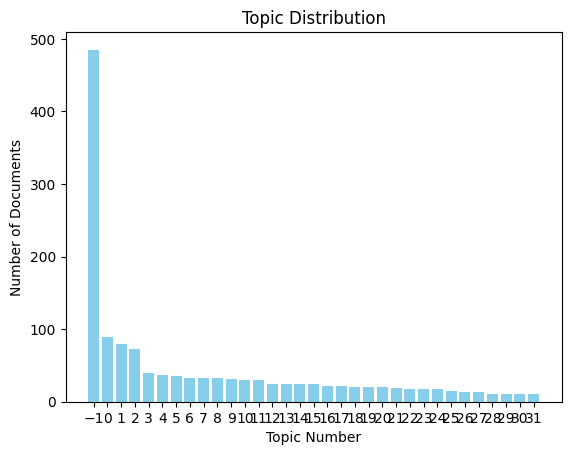

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'topics' contains the output from BERTopic
unique_topics_oct_delta, counts_oct_delta = np.unique(topics_oct_delta, return_counts=True)

# Simple bar chart to show topic distribution
plt.bar(unique_topics_oct_delta, counts_oct_delta, color='skyblue')
plt.xlabel('Topic Number')
plt.ylabel('Number of Documents')
plt.title('Topic Distribution')
plt.xticks(unique_topics_oct_delta)
plt.show()

